In [12]:
# Importar librerías
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Crear un array de 10x10 lleno de ceros y con paredes de 1
def createMaze(x, y):
    MAZE = np.zeros((x, y))
    MAZE[0, :] = 1
    MAZE[-1, :] = 1
    MAZE[:, 0] = 1
    MAZE[:, -1] = 1
    return MAZE

In [ ]:
MAZE = createMaze(10, 10)
MAZE[1,3] =1  # Add obstacles
MAZE[2,3] =1
MAZE[3,4] =1
MARK = MAZE[:]

In [ ]:
class Agente:  # Define agent class
    def __init__(self, x, y, color, traceColor=0):
        self.x = x
        self.y = y
        self.color = color
        self.trace = traceColor
        MARK[self.y, self.x] = self.color  # marc where we are

    def mover(self, direccion, mark):
        mark[self.y, self.x] = self.trace  # Marc the place we were before
        
        self.x += direccion[1]  # move the agent to the direction
        self.y += direccion[0]
        
        print("moviendo a: ", self.y, self.x)
        mark[self.y, self.x] = self.color # Marc the place we are
        print(mark)  # Each time we move, we print the new maze to see the changes

In [ ]:
walker = Agente(1, 1, 2, 3)  # This will walk the maze until it reaches the goal
goal =   Agente(8, 8, 4)  # This is the goal

In [18]:
def maze2graph(maze):
    graph = {}
    # iterate over the cells of the maze
    for y in range(len(maze)):
        for x in range(len(maze[0])):
            if maze[y][x] != 1:  # If it is not a wall
                graph[(y, x)] = []  # Create an empty list for the neighbors of the current cell and the directions to reach them
                if maze[y-1][x] != 1:  
                    graph[(y, x)].append(((-1,0), (y-1, x)))  # Down
                if maze[y-1][x+1] != 1:
                    graph[(y, x)].append(((-1,1), (y-1, x+1)))  # Down-Right
                if maze[y][x+1] != 1:
                    graph[(y, x)].append(((0,1), (y, x+1)))  # Right
                if maze[y+1][x+1] != 1:
                    graph[(y, x)].append(((1,1), (y+1, x+1)))  # Up-Right
                if maze[y+1][x] != 1:
                    graph[(y, x)].append(((1,0), (y+1, x)))  # Up
                if maze[y+1][x-1] != 1:  
                    graph[(y, x)].append(((1,-1), (y+1, x-1)))  # Up-Left
                if maze[y][x-1] != 1:
                    graph[(y, x)].append(((0,-1), (y, x-1)))  # Left
                if maze[y-1][x-1] != 1:
                    graph[(y, x)].append(((-1,-1), (y-1, x-1)))  # Down-Left
    return graph

In [19]:
def find_path_dfs(graph, current, goal, path=(), visited=None):
    if visited is None:
        visited = set()
    if current == goal:
        return path  # Return the path if we have reached the goal
    if current in visited:
        return None
    visited.add(current)

    for direction, neighbour in graph[current]:  # Iterate over the neighbors of the current cell
        result = find_path_dfs(graph, neighbour, goal, path + (direction,), visited)  # Recursively search for the path, adding the direction to the path
        if result is not None:
            return result
    return "NO WAY!" # It will return this if there is no possible path to reach the goal

In [20]:
def visualize_example(maze):  # Function to visualize the maze
    plt.figure()
    plt.imshow(maze)
    plt.colorbar()
    plt.grid(False)
    plt.show()

In [21]:
start, goal = (1, 1), (len(MARK) - 2, len(MARK[0]) - 2) # Set the start and goal positions
path = find_path_dfs(maze2graph(MARK), start, goal) # Find the path using the DFS algorithm
print("Path found:", path)

Path found: ((0, 1), (1, 0), (1, 1), (-1, 1), (-1, 0), (0, 1), (0, 1), (0, 1), (0, 1), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0))


moviendo a:  1 2
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 3. 2. 1. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 4. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
moviendo a:  2 2
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 3. 3. 1. 0. 0. 0. 0. 0. 1.]
 [1. 0. 2. 1. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 4. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
moviendo a:  3 3
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 3. 3. 1. 0. 0. 0. 0. 0. 1.]
 [1. 0. 3. 1. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 2. 1. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 

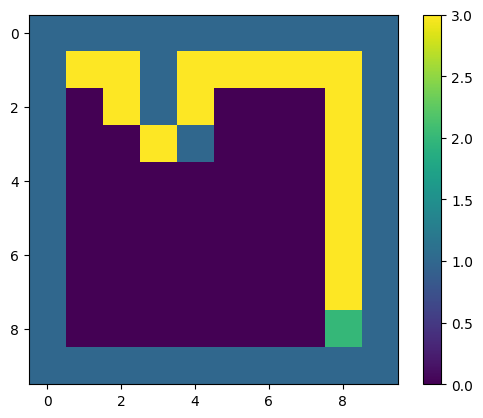

In [22]:
 # Now, we go through the path and move the walker accordingly
for direction in path:
    walker.mover(direction, MARK)  # Move the walker according to the path

visualize_example(MARK)  # Visualize the final maze